# Self Case Study 2

## 1. Creating the Dataset using images scraped from the website

In [63]:
#Creating function for acquiring paths of the image files
import os

def getfilespath(path,dc):
    images=[]
    for file in os.listdir(path):
        os.rename(path+file,path+file)
        images.append(path+file)
    return images

In [64]:
#Getting the file paths for images of men casual shirts
filesPath_Men_casual_shirts = 'Desktop/Selfcase_study2_image_dataset/Men_casual_shirts/'
dc='mcs'
images_of_Men_casual_shirts = getfilespath(filesPath_Men_casual_shirts,dc)
len(images_of_Men_casual_shirts)

2012

In [34]:
#Getting the file paths for images of men casual Trousers
filesPath_Men_casual_trousers = 'Desktop/Selfcase_study2_image_dataset/Men_casual_trousers/'
dc='mct'
images_of_Men_casual_trousers = getfilespath(filesPath_Men_casual_trousers,dc)
len(images_of_Men_casual_trousers)

2125

In [37]:
#Getting the file paths for images of men shorts
filesPath_Men_shorts = 'Desktop/Selfcase_study2_image_dataset/Men_shorts/'
dc='ms'
images_of_Men_shorts = getfilespath(filesPath_Men_shorts,dc)
len(images_of_Men_shorts)

2138

In [40]:
#Getting the file paths for images of men T-shirts
filesPath_Men_T_shirts = 'Desktop/Selfcase_study2_image_dataset/Men_T_shirts/'
dc='mTs'
images_of_Men_T_shirts = getfilespath(filesPath_Men_T_shirts,dc)
len(images_of_Men_T_shirts)

2069

In [42]:
#Getting the file paths for images of Women shorts and skirts
filesPath_Women_shorts_and_skirts = 'Desktop/Selfcase_study2_image_dataset/Women_shorts_and_skirts/'
dc='wss'
images_of_Women_shorts_and_skirts = getfilespath(filesPath_Women_shorts_and_skirts,dc)
len(images_of_Women_shorts_and_skirts)

2139

In [263]:
import pandas as pd

df_1 = pd.DataFrame(images_of_Men_casual_shirts,columns =['File Paths'])
df_1['Dress Type']='Men Casual Shirt'
df_1.head()

,File Paths,Dress Type
0,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men Casual Shirt
1,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men Casual Shirt
2,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men Casual Shirt
3,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men Casual Shirt
4,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men Casual Shirt


In [264]:
import pandas as pd

df_2 = pd.DataFrame(images_of_Men_casual_trousers,columns =['File Paths'])
df_2['Dress Type']='Men casual trousers'
df_2.head()

,File Paths,Dress Type
0,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men casual trousers
1,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men casual trousers
2,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men casual trousers
3,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men casual trousers
4,Desktop/Selfcase_study2_image_dataset/Men_casu...,Men casual trousers


In [265]:
import pandas as pd

df_3 = pd.DataFrame(images_of_Men_shorts,columns =['File Paths'])
df_3['Dress Type']='Men shorts'
df_3.head()

,File Paths,Dress Type
0,Desktop/Selfcase_study2_image_dataset/Men_shor...,Men shorts
1,Desktop/Selfcase_study2_image_dataset/Men_shor...,Men shorts
2,Desktop/Selfcase_study2_image_dataset/Men_shor...,Men shorts
3,Desktop/Selfcase_study2_image_dataset/Men_shor...,Men shorts
4,Desktop/Selfcase_study2_image_dataset/Men_shor...,Men shorts


In [266]:
import pandas as pd

df_4 = pd.DataFrame(images_of_Men_T_shirts,columns =['File Paths'])
df_4['Dress Type']='Men T-shirts'
df_4.head()

,File Paths,Dress Type
0,Desktop/Selfcase_study2_image_dataset/Men_T_sh...,Men T-shirts
1,Desktop/Selfcase_study2_image_dataset/Men_T_sh...,Men T-shirts
2,Desktop/Selfcase_study2_image_dataset/Men_T_sh...,Men T-shirts
3,Desktop/Selfcase_study2_image_dataset/Men_T_sh...,Men T-shirts
4,Desktop/Selfcase_study2_image_dataset/Men_T_sh...,Men T-shirts


In [267]:
import pandas as pd

df_5 = pd.DataFrame(images_of_Women_shorts_and_skirts,columns =['File Paths'])
df_5['Dress Type']='Women shorts and skirts'
df_5.head()

,File Paths,Dress Type
0,Desktop/Selfcase_study2_image_dataset/Women_sh...,Women shorts and skirts
1,Desktop/Selfcase_study2_image_dataset/Women_sh...,Women shorts and skirts
2,Desktop/Selfcase_study2_image_dataset/Women_sh...,Women shorts and skirts
3,Desktop/Selfcase_study2_image_dataset/Women_sh...,Women shorts and skirts
4,Desktop/Selfcase_study2_image_dataset/Women_sh...,Women shorts and skirts


In [268]:
final_df=pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
final_df.shape

(10483, 2)

In [269]:
from tqdm import tqdm

final_df['Type of wear']='wear'
for i in tqdm(final_df['Dress Type']):
    if i=='Women shorts and skirts' or i=='Men shorts':
       final_df.loc[final_df['Dress Type']==i,'Type of wear']='Bottom wear'
    else:
       final_df.loc[final_df['Dress Type']==i,'Type of wear']='Top wear'

100%|███████████████████████████████████████████████████████████████████████████| 10483/10483 [00:26<00:00, 390.75it/s]


In [271]:
full_shot_img_filepath=os.listdir('Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual')
len(full_shot_img_filepath)

1136

In [272]:
final_df['Full shot/Not a full shot']='Not a full shot'

for i in tqdm(final_df['File Paths']):
    for j in full_shot_img_filepath:
        if i[56:][:-4]==j[:66][:-4]:
           final_df.loc[final_df['File Paths']==i,'Full shot/Not a full shot']='Full shot'

for i in tqdm(final_df['File Paths']):
    for j in full_shot_img_filepath:
        if i[58:][:-4]==j[:66][:-4]:
           final_df.loc[final_df['File Paths']==i,'Full shot/Not a full shot']='Full shot'   
        
for i in tqdm(final_df['File Paths']):
    for j in full_shot_img_filepath:
        if i[49:][:-4]==j[:66][:-4]:
           final_df.loc[final_df['File Paths']==i,'Full shot/Not a full shot']='Full shot'
        
for i in tqdm(final_df['File Paths']):
    for j in full_shot_img_filepath:
        if i[51:][:-4]==j[:66][:-4]:
           final_df.loc[final_df['File Paths']==i,'Full shot/Not a full shot']='Full shot'
        
for i in tqdm(final_df['File Paths']):
    for j in full_shot_img_filepath:
        if i[62:][:-4]==j[:66][:-4]:
           final_df.loc[final_df['File Paths']==i,'Full shot/Not a full shot']='Full shot'

100%|██████████████████████████████████████████████████████████████████████████| 10483/10483 [00:04<00:00, 2594.84it/s]


In [287]:
final_df.to_csv('self_casestudy_dataset.csv')

## 2. Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd

final_df=pd.read_csv('self_casestudy_dataset.csv')

Let us check number of categories in the dataset and number of images for each category

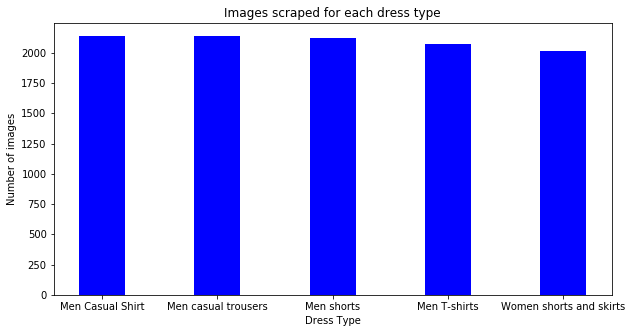

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

no_of_images_per_each_dress_type = list(final_df['Dress Type'].value_counts().values) 
dress_type = list(final_df['Dress Type'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dress_type, no_of_images_per_each_dress_type, color ='blue',  
        width = 0.4) 
  
plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Images scraped for each dress type") 
plt.show() 

Examples for each dress type
1. Men Casual Shirt

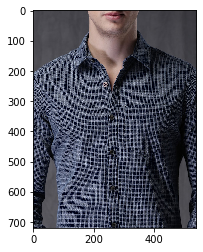

In [4]:
import cv2 as cv

img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_shirts/mcs1img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Men casual trouser

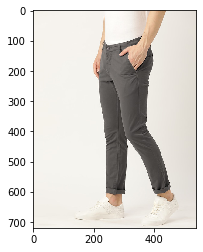

In [5]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_trousers/mct1img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

3. Men shorts

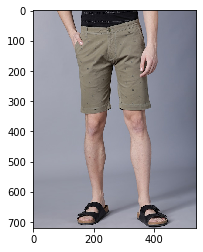

In [6]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_shorts/ms1img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

4. Men T-shirts

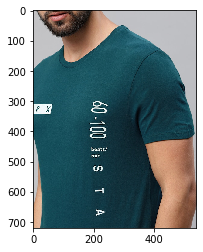

In [7]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_T_shirts/mTs1img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

5. Women shorts and skirts

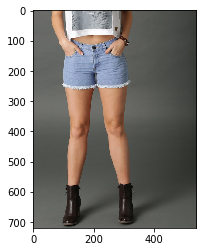

In [8]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Women_shorts_and_skirts/wss1img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Let us check number of images for top wear and bottom wear

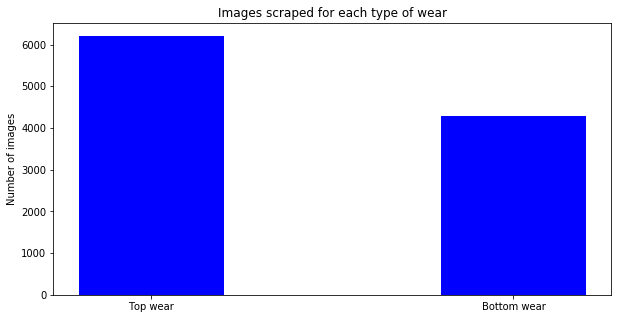

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

no_of_images_per_each_dress_wear = list(final_df['Type of wear'].value_counts().values) 
wear_type = list(final_df['Type of wear'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(wear_type, no_of_images_per_each_dress_wear, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Images scraped for each type of wear") 
plt.show() 

Examples for Topwear and Bottomwear
1. Topwear

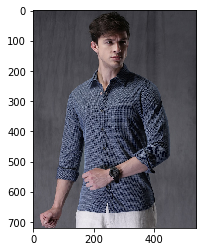

In [10]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_shirts/mcs2img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Bottomwear

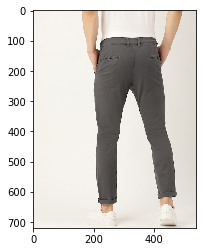

In [11]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_trousers/mct2img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Let us check number of fullshot images and non-fullshot images in the dataset

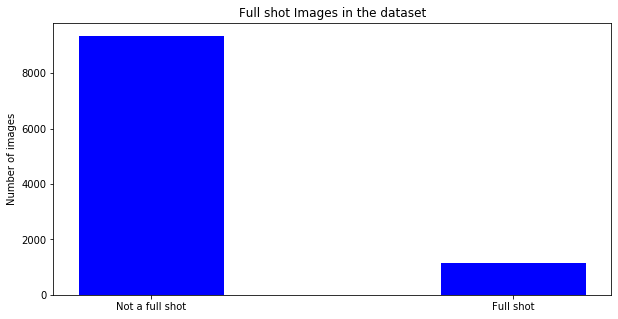

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

no_of_images_per_each_shot_type = list(final_df['Full shot/Not a full shot'].value_counts().values) 
shot_type = list(final_df['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in the dataset") 
plt.show() 

Let us check number of fullshot images and non-fullshot images for each dress type
1. Men Casual shirt

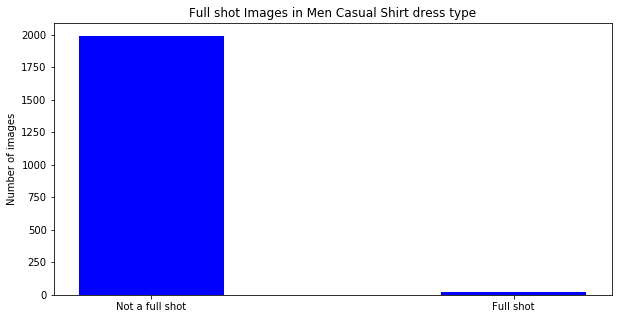

In [279]:
#Plotting number of fullshot images and non-fullshot images for dataset having Dress Type='Men Casual shirt' 
no_of_images_per_each_shot_type=list(final_df.loc[final_df['Dress Type']=='Men Casual Shirt']['Full shot/Not a full shot']\
                                .value_counts().values)
shot_type = list(final_df.loc[final_df['Dress Type']=='Men Casual Shirt']['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in Men Casual Shirt dress type") 
plt.show() 

Example of Full shot image in men casual shirt dress type

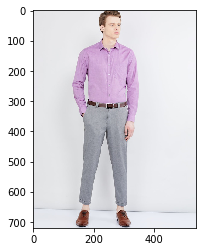

In [13]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_shirts/mcs23img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Men casual trousers

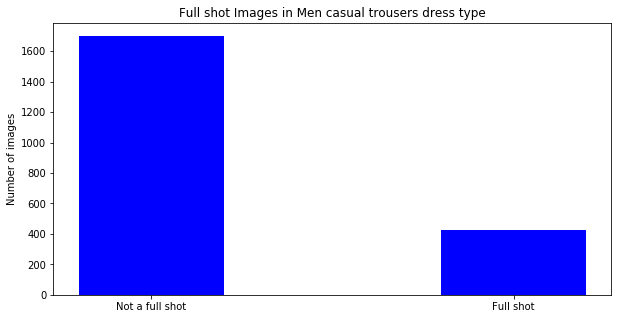

In [283]:
#Plotting number of fullshot images and non-fullshot images for dataset having Dress Type='Men casual trousers' 
no_of_images_per_each_shot_type= list(final_df.loc[final_df['Dress Type']=='Men casual trousers']\
                                      ['Full shot/Not a full shot'].value_counts().values)
shot_type = list(final_df.loc[final_df['Dress Type']=='Men casual trousers']['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in Men casual trousers dress type") 
plt.show() 

Example of Full shot image in men casual trouser dress type

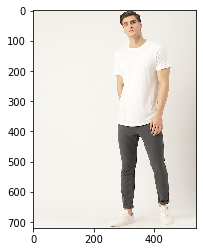

In [14]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_trousers/mct3img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

3. Men shorts

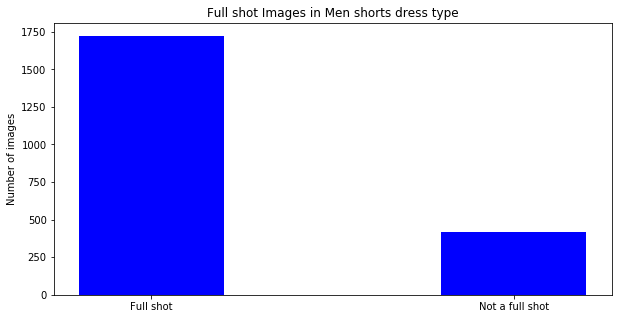

In [284]:
#Plotting number of fullshot images and non-fullshot images for dataset having Dress Type='Men shorts' 
no_of_images_per_each_shot_type= list(final_df.loc[final_df['Dress Type']=='Men shorts']\
                                      ['Full shot/Not a full shot'].value_counts().values)
shot_type = list(final_df.loc[final_df['Dress Type']=='Men shorts']['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in Men shorts dress type") 
plt.show() 

Example of Full shot image in men short dress type

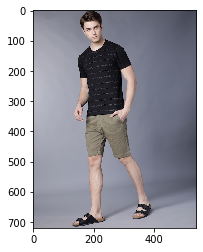

In [19]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_shorts/ms0img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

4. Men T-shirts

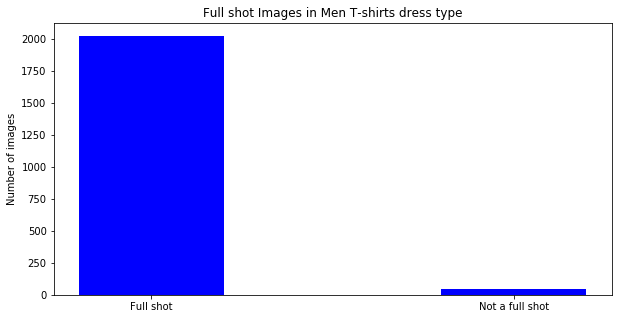

In [285]:
#Plotting number of fullshot images and non-fullshot images for dataset having Dress Type='Men T-shirts' 
no_of_images_per_each_shot_type= list(final_df.loc[final_df['Dress Type']=='Men T-shirts']\
                                      ['Full shot/Not a full shot'].value_counts().values)
shot_type = list(final_df.loc[final_df['Dress Type']=='Men T-shirts']['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in Men T-shirts dress type") 
plt.show() 

Example of Full shot image in men T-shirt dress type

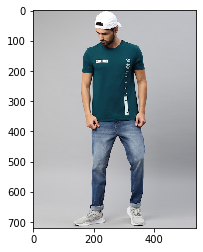

In [22]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_T_shirts/mTs0img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

5. Women shorts and skirts

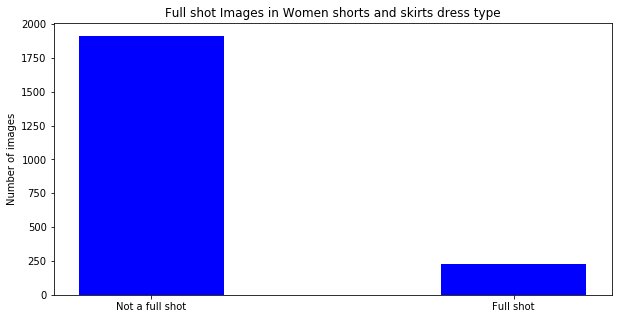

In [286]:
#Plotting number of fullshot images and non-fullshot images for dataset having Dress Type='Women shorts and skirts' 
no_of_images_per_each_shot_type= list(final_df.loc[final_df['Dress Type']=='Women shorts and skirts']\
                                      ['Full shot/Not a full shot'].value_counts().values)
shot_type = list(final_df.loc[final_df['Dress Type']=='Women shorts and skirts']['Full shot/Not a full shot'].unique()) 

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(shot_type, no_of_images_per_each_shot_type, color ='blue',  
        width = 0.4) 
  
#plt.xlabel("Dress Type") 
plt.ylabel("Number of images") 
plt.title("Full shot Images in Women shorts and skirts dress type") 
plt.show() 

Example of Full shot image in women shorts and skirts dress type

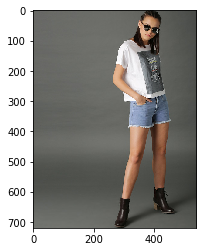

In [27]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Women_shorts_and_skirts/wss3img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## 3. Simple pose estimation using opencv for detecting full shot images in the dataset

key points and joints assignment

In [4]:
#https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.py
import cv2 as cv
import matplotlib.pyplot as plt

net=cv.dnn.readNetFromTensorflow('graph_opt.pb')

inWidth = 368
inHeight = 368
thr = 0.2

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

Initially a full shot image is taken for experiment

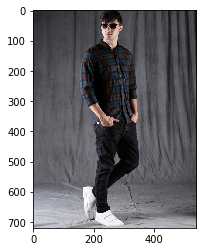

In [29]:
img = cv.imread('Desktop/Selfcase_study2_image_dataset/Men_casual_shirts/mcs15img.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


Function that finds the keypoints and returns initial image with keypoints and joints

In [30]:
#https://github.com/opencv/opencv/blob/master/samples/dnn/openpose.py
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
    
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame,points


Key points and joint on the initial image

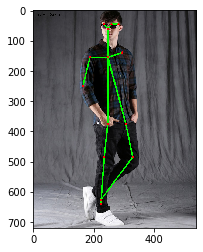

In [31]:
estimated_image,points = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

Using simple pose estimation seperating full shot images from the dataset

In [32]:
from tqdm import tqdm

full_shot_imagepaths=[]
for i in tqdm(final_df['File Paths']):
      img=cv.imread(i)
      estimated_image,points = pose_estimation(img)
      if points[9]!=None and points[12]!=None and points[10]!=None and points[13]!=None and points[14]!=None and points[15]!=None:
         full_shot_imagepaths.append(i)  


100%|██████████████████████████████████████████████████████████████████████████| 10483/10483 [1:06:22<00:00,  2.63it/s]


In [43]:
len(full_shot_imagepaths)

1143

Out of 1143 images that are predicted as full shot images 1136 are the actual full shot images.

Shifting all the predicted full shot images to a specific folder in the system

In [44]:
import shutil, os
files = full_shot_imagepaths
for f in tqdm(files):
    shutil.copy(f, 'Desktop/Selfcase_study2_image_dataset/Full_shot_images_predicted')

100%|█████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:01<00:00, 978.09it/s]


### Bounding boxes on the full shot images to recognize different dress types(using yolo_v3)

In [10]:
import cv2 as cv
import numpy as np

#Load YOLO
net = cv.dnn.readNet("Downloads/yolov3_custom_7000.weights","Downloads/yolov3_custom.cfg")
classes = []
with open("Downloads/classes.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [11]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors= np.random.uniform(0,255,size=(len(classes),3))

Initial full shot images with out any bounding boxes

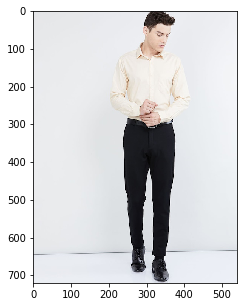

In [12]:
import matplotlib.pyplot as plt

#loading image
img = cv.imread("Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual/mcs114img.png")
img = cv.resize(img,None,fx=1,fy=1)
height,width,channels = img.shape
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

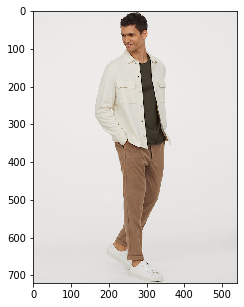

In [13]:
#loading image
img = cv.imread("Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual/mct1067img.png")
img = cv.resize(img,None,fx=1,fy=1)
height,width,channels = img.shape
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

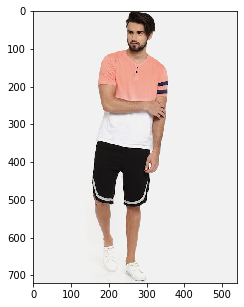

In [14]:
img = cv.imread("Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual/ms7img.png")
img = cv.resize(img,None,fx=1,fy=1)
height,width,channels = img.shape
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

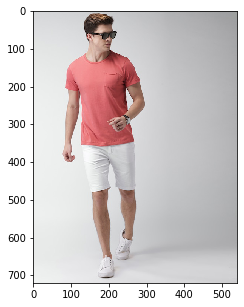

In [15]:
img = cv.imread("Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual/mTs621img.png")
img = cv.resize(img,None,fx=1,fy=1)
height,width,channels = img.shape
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

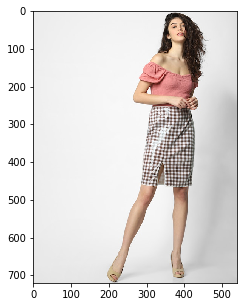

In [22]:
img = cv.imread("Desktop/Selfcase_study2_image_dataset/Full_shot_images_actual/wss23img.png")
img = cv.resize(img,None,fx=1,fy=1)
height,width,channels = img.shape
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [16]:
#Creating bounding box function
#https://medium.com/analytics-vidhya/object-detection-with-opencv-python-using-yolov3-481f02c6aa35
from tqdm import tqdm

def yolo_v3_boundingbox(img):        

    #detecting objects
    blob = cv.dnn.blobFromImage(img,.00392,(416,416),(0,0,0),swapRB = True,crop=False)

    net.setInput(blob)
    outs = net.forward(outputlayers)
    #print(outs[1])


    #Showing info on screen/ get confidence score of algorithm in detecting an object in blob
    class_ids=[]
    confidences=[]
    boxes=[]
    for out in tqdm(outs):
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
            #object detected
               center_x= int(detection[0]*width)
               center_y= int(detection[1]*height)
               w = int(detection[2]*width)
               h = int(detection[3]*height)
        
               #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
               #rectangle co-ordinaters
               x=int(center_x - w/2)
               y=int(center_y - h/2)
               #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
               boxes.append([x,y,w,h]) #put all rectangle areas
               confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
               class_ids.append(class_id) #name of the object tha was detected

    indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6)

    img1=[]
    font = cv.FONT_HERSHEY_PLAIN
    for i in tqdm(range(len(boxes))):
        if i in indexes:
           x,y,w,h = boxes[i]
           label = str(classes[class_ids[i]])
           color = colors[i]
           img1.append(img[y:y+h,x:x+w])
           cv.rectangle(img,(x,y),(x+w,y+h),color,2)
           
           cv.putText(img,label,(x,y+30),font,2,(255,0,0),3)
           
            
    return img,img1

Full shot images after applying yolo_v3

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4116.10it/s]


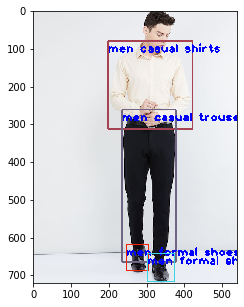

In [32]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4002.20it/s]


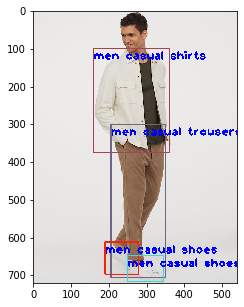

In [35]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


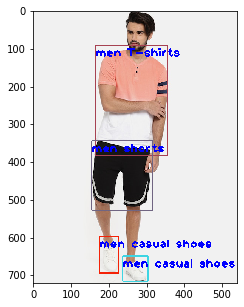

In [45]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.99it/s]


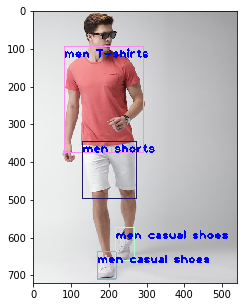

In [17]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

In [18]:
cv.imwrite('full_img1.jpg',final_img)

True

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1997.53it/s]


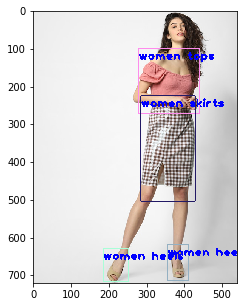

In [23]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

In [24]:
cv.imwrite('full_img2.jpg',final_img)

True

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


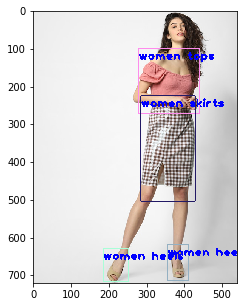

In [20]:
import matplotlib.pyplot as plt

final_img,img_parts=yolo_v3_boundingbox(img)
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

In [100]:
img_parts_1=img_parts[0]
img_parts_2=img_parts[1]
img_parts_3=img_parts[3]

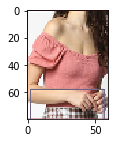

In [101]:
resized1 = cv.resize(img_parts_1, (60,80), interpolation = cv.INTER_CUBIC)
plt.figure(figsize=(6, 2))
plt.imshow(cv.cvtColor(resized1, cv.COLOR_BGR2RGB))

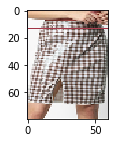

In [102]:
resized2 = cv.resize(img_parts_2, (60,80), interpolation = cv.INTER_CUBIC)
plt.figure(figsize=(6, 2))
plt.imshow(cv.cvtColor(resized2, cv.COLOR_BGR2RGB))

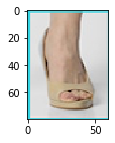

In [103]:
resized3 = cv.resize(img_parts_3, (60,80), interpolation = cv.INTER_CUBIC)
plt.figure(figsize=(6, 2))
plt.imshow(cv.cvtColor(resized3, cv.COLOR_BGR2RGB))

In [104]:
#cv.imwrite('main_img.jpg',final_img)
cv.imwrite('img_part13.jpg', resized1) 
cv.imwrite('img_part14.jpg', resized2)
cv.imwrite('img_part15.jpg', resized3)

True